## **Milestone 1: Data Collection & Preparation**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
movies = pd.read_csv("data/movies.csv", low_memory=False)

### **Movies:**

In [92]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [93]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [94]:
movies.drop(columns=["belongs_to_collection","homepage","production_companies","spoken_languages","original_title","video","tagline"], inplace=True)

In [95]:
# missing values
movies.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
overview                954
popularity                5
poster_path             386
production_countries      3
release_date             87
revenue                   6
runtime                 263
status                   87
title                     6
vote_average              6
vote_count                6
dtype: int64

In [96]:
movies.dropna(inplace=True)

In [97]:
# duplicates
movies.duplicated().sum()

17

In [98]:
movies.drop_duplicates(inplace=True)

In [99]:
# prepare dtypes
movies["adult"] = movies["adult"].replace({"True": True, "False": False})
movies["budget"] = movies["budget"].astype("int32")
movies["id"] = movies["id"].astype("int32")
movies["imdb_id"] = movies["imdb_id"].astype("str")
movies["overview"] = movies["overview"].astype("str")
movies["popularity"] = movies["popularity"].astype("float16")
movies["release_date"] = pd.to_datetime(movies["release_date"])
movies["release_year"] = movies["release_date"].dt.year
movies["poster_path"] = movies["poster_path"].astype("str")
movies["revenue"] = movies["revenue"].astype("int32")
movies["runtime"] = movies["runtime"].astype("int16")
movies["status"] = movies["status"].astype("category")
movies["title"] = movies["title"].astype("str")
movies["vote_average"] = movies["vote_average"].astype("float16")
movies["vote_count"] = movies["vote_count"].astype("int16")

C:\Users\eslam\AppData\Local\Temp\ipykernel_6596\3026965908.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movies["adult"] = movies["adult"].replace({"True": True, "False": False})


In [100]:
movies.head()

,adult,budget,genres,id,imdb_id,original_language,overview,popularity,poster_path,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.953125,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81,Released,Toy Story,7.699219,5415,1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015625,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104,Released,Jumanji,6.898438,2413,1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.710938,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101,Released,Grumpier Old Men,6.500000,92,1995
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859375,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127,Released,Waiting to Exhale,6.101562,34,1995
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,8.390625,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106,Released,Father of the Bride Part II,5.699219,173,1995


In [101]:
import ast
movies['genres'] = movies['genres'].apply(ast.literal_eval)
movies['genres'] = movies['genres'].apply(lambda x: '|'.join([d['name'] for d in x]))

In [102]:
genres_onehot = movies["genres"].str.get_dummies(sep="|")
movies = pd.concat([movies, genres_onehot], axis=1)
movies.drop("genres", axis=1, inplace=True)
movies.head()

,adult,budget,id,imdb_id,original_language,overview,popularity,poster_path,production_countries,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,30000000,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.953125,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,0,0,0,0,0,0,0,0,0,0
1,False,65000000,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.015625,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,0,0,0,0,0,0,0,0,0,0
2,False,0,15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.710938,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,0,0,0,0,1,0,0,0,0,0
3,False,16000000,31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.859375,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,0,0,0,0,1,0,0,0,0,0
4,False,0,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.390625,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,0,0,0,0,0,0,0,0,0,0


In [103]:
movies = movies[movies["release_year"] >= 2000].reset_index(drop=True)
movies.head()

,adult,budget,id,imdb_id,original_language,overview,popularity,poster_path,production_countries,release_date,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,0,131232,tt0333373,en,"Two Sicilian friends, Nunzio and Pino, share t...",0.003948,/jo4n8M8EHedIuatB39C8EEmJBH8.jpg,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",2002-03-20,...,0,0,0,0,0,0,0,0,0,0
1,False,0,79782,tt1684935,en,An atmospheric coming-of-age story featuring a...,0.147095,/lUmJiBTKdesFDkgSvV9zecCgNO6.jpg,[],2010-05-25,...,0,0,0,0,1,0,0,0,0,0
2,False,0,141210,tt2250194,en,"The town of Derry has a secret, but no one tol...",0.135620,/pQpyEmFTGaox4yLuUXmiD2IDIbA.jpg,[],2013-10-12,...,0,1,0,0,0,0,0,0,0,0
3,False,0,143750,tt2140519,en,"As her surroundings are invaded by outsiders, ...",0.211792,/ePPNVWyIKYBdsGrOrYVaPKM8DlM.jpg,[],2012-06-20,...,0,0,0,0,0,0,0,0,0,0
4,False,0,84198,tt1736049,en,"Using personal stories, this powerful document...",0.500977,/jn8L1QdWWX5c0NUOLjzaSXtZrbt.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-22,...,0,0,0,0,0,0,0,0,0,0


In [104]:
movies.drop(columns=["release_date"], inplace=True)

In [105]:
movies.rename(columns={'id': 'movieId'}, inplace=True)


In [106]:
movies["title"].duplicated().sum()

875

In [107]:
movies["title"].drop_duplicates(inplace=True)

In [108]:
movies.to_csv("data/movies_clean.csv", index=False)

In [109]:
movies.shape

(23243, 36)

## **Milestone 2: Exploratory Data Analysis (EDA)**

In [110]:
movies.head()

,adult,budget,movieId,imdb_id,original_language,overview,popularity,poster_path,production_countries,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,0,131232,tt0333373,en,"Two Sicilian friends, Nunzio and Pino, share t...",0.003948,/jo4n8M8EHedIuatB39C8EEmJBH8.jpg,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,79782,tt1684935,en,An atmospheric coming-of-age story featuring a...,0.147095,/lUmJiBTKdesFDkgSvV9zecCgNO6.jpg,[],0,...,0,0,0,0,1,0,0,0,0,0
2,False,0,141210,tt2250194,en,"The town of Derry has a secret, but no one tol...",0.135620,/pQpyEmFTGaox4yLuUXmiD2IDIbA.jpg,[],0,...,0,1,0,0,0,0,0,0,0,0
3,False,0,143750,tt2140519,en,"As her surroundings are invaded by outsiders, ...",0.211792,/ePPNVWyIKYBdsGrOrYVaPKM8DlM.jpg,[],0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,84198,tt1736049,en,"Using personal stories, this powerful document...",0.500977,/jn8L1QdWWX5c0NUOLjzaSXtZrbt.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
for col in movies.iloc[:, 16:36]:
    print(f" the number of {col} is: {movies[col].sum()}")

 the number of Action is: 3313
 the number of Adventure is: 1600
 the number of Animation is: 1167
 the number of Comedy is: 6676
 the number of Crime is: 1914
 the number of Documentary is: 2984
 the number of Drama is: 10275
 the number of Family is: 1493
 the number of Fantasy is: 1114
 the number of Foreign is: 986
 the number of History is: 683
 the number of Horror is: 2516
 the number of Music is: 694
 the number of Mystery is: 1207
 the number of Romance is: 3168
 the number of Science Fiction is: 1523
 the number of TV Movie is: 480
 the number of Thriller is: 4498
 the number of War is: 443
 the number of Western is: 144


In [112]:
top_10_times = movies.sort_values(by="popularity", ascending=False).head(10).reset_index(drop=True)
top_10_times[["title", "popularity"]]

,title,popularity
0,Minions,547.500
1,Wonder Woman,294.250
2,Beauty and the Beast,287.250
3,Baby Driver,228.000
4,Big Hero 6,213.875
5,Deadpool,187.875
6,Guardians of the Galaxy Vol. 2,185.375
7,Avatar,185.125
8,John Wick,183.875
9,Gone Girl,154.750


C:\Users\eslam\AppData\Local\Temp\ipykernel_6596\1384546078.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "release_year", data=movies, kind="count", palette="mako")


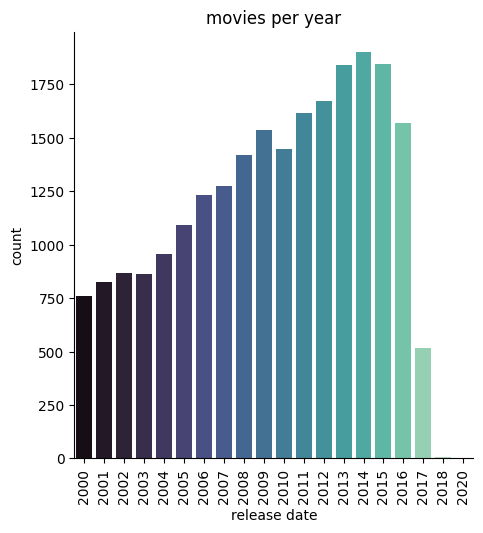

In [113]:
sns.catplot(x = "release_year", data=movies, kind="count", palette="mako")
plt.xlabel("release date")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("movies per year")
plt.show()

In [114]:
top_10_ratings = movies.sort_values(by="vote_count", ascending=False).head(10).reset_index(drop=True)
top_10_ratings[["title", "vote_count"]]

,title,vote_count
0,Inception,14075
1,The Dark Knight,12269
2,Avatar,12114
3,The Avengers,12000
4,Deadpool,11444
5,Interstellar,11187
6,Django Unchained,10297
7,Guardians of the Galaxy,10014
8,The Hunger Games,9634
9,Mad Max: Fury Road,9629


C:\Users\eslam\AppData\Local\Temp\ipykernel_6596\630607128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="vote_count", y="title", data=top_10_ratings, palette="mako")


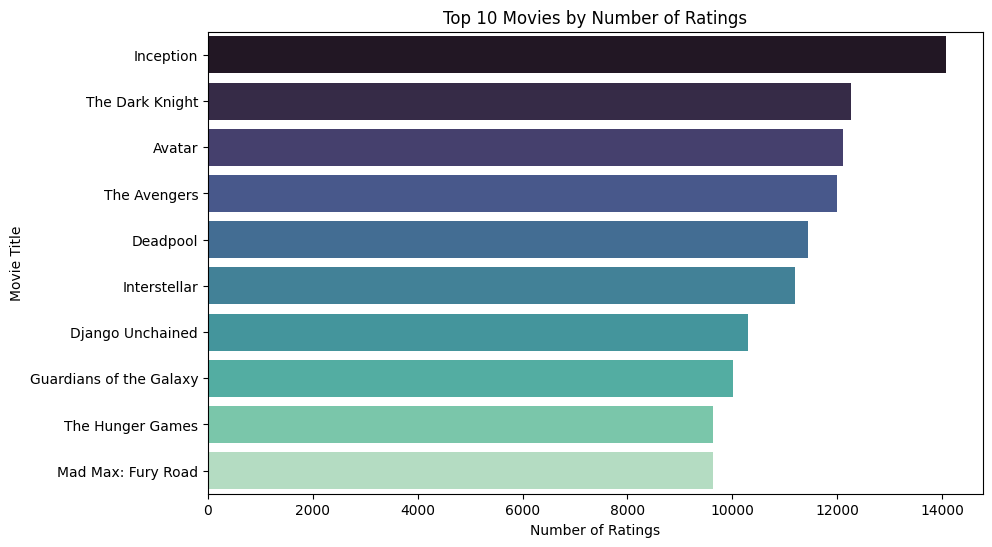

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(x="vote_count", y="title", data=top_10_ratings, palette="mako")
plt.title("Top 10 Movies by Number of Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()


C:\Users\eslam\AppData\Local\Temp\ipykernel_6596\129907003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y = "language",x = "count", data=top_languages, kind="bar", palette="mako")


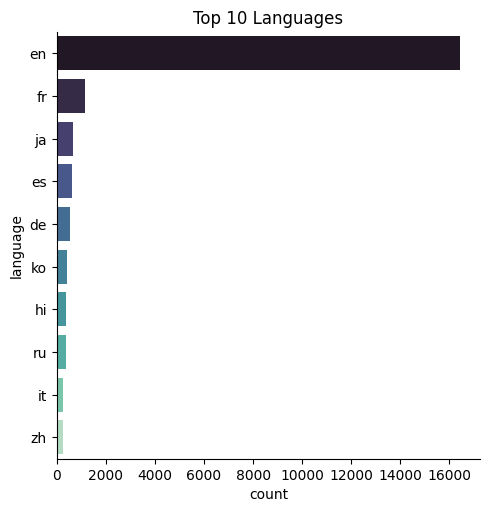

In [116]:
top_languages = movies["original_language"].value_counts().head(10).reset_index()
top_languages.columns = ["language", "count"]

sns.catplot(y = "language",x = "count", data=top_languages, kind="bar", palette="mako")
plt.xlabel("count")
plt.ylabel("language")
plt.title("Top 10 Languages")
plt.show()

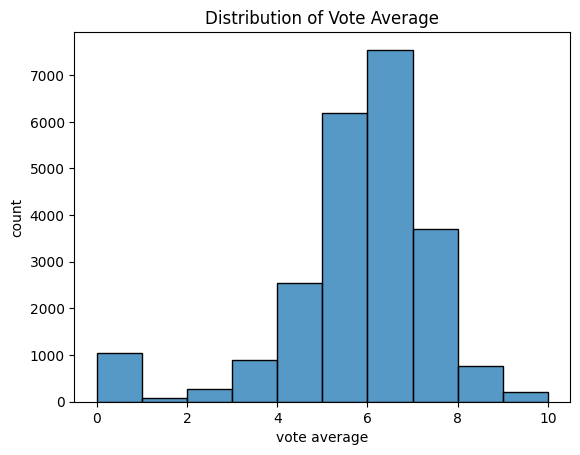

In [117]:
sns.histplot(data=movies, x="vote_average", bins=10)
plt.xlabel("vote average")
plt.ylabel("count")
plt.title("Distribution of Vote Average")
plt.show()

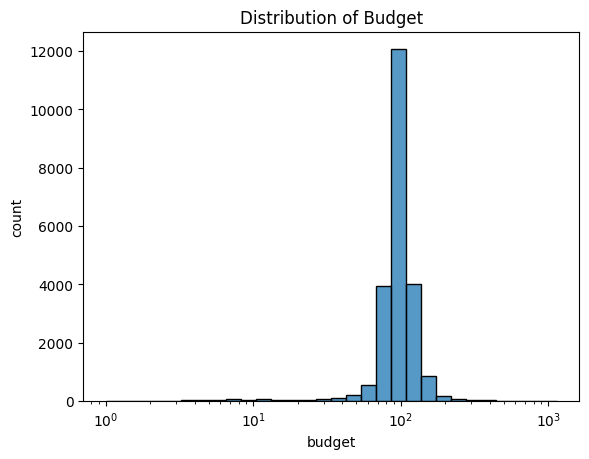

In [118]:
sns.histplot(data=movies, x="runtime", bins=30,log_scale=True)
plt.xlabel("budget")
plt.ylabel("count")
plt.title("Distribution of Budget")
plt.show()

----

## **Milestone 3: Build First Model (Content-based Filtering)**

In [119]:
movies.head()

,adult,budget,movieId,imdb_id,original_language,overview,popularity,poster_path,production_countries,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,0,131232,tt0333373,en,"Two Sicilian friends, Nunzio and Pino, share t...",0.003948,/jo4n8M8EHedIuatB39C8EEmJBH8.jpg,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,79782,tt1684935,en,An atmospheric coming-of-age story featuring a...,0.147095,/lUmJiBTKdesFDkgSvV9zecCgNO6.jpg,[],0,...,0,0,0,0,1,0,0,0,0,0
2,False,0,141210,tt2250194,en,"The town of Derry has a secret, but no one tol...",0.135620,/pQpyEmFTGaox4yLuUXmiD2IDIbA.jpg,[],0,...,0,1,0,0,0,0,0,0,0,0
3,False,0,143750,tt2140519,en,"As her surroundings are invaded by outsiders, ...",0.211792,/ePPNVWyIKYBdsGrOrYVaPKM8DlM.jpg,[],0,...,0,0,0,0,0,0,0,0,0,0
4,False,0,84198,tt1736049,en,"Using personal stories, this powerful document...",0.500977,/jn8L1QdWWX5c0NUOLjzaSXtZrbt.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
movies.columns

Index(['adult', 'budget', 'movieId', 'imdb_id', 'original_language',
       'overview', 'popularity', 'poster_path', 'production_countries',
       'revenue', 'runtime', 'status', 'title', 'vote_average', 'vote_count',
       'release_year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
import re

def get_root_title(title):
    root = re.sub(r'\(\d{4}\)', '', title)
    root = re.sub(r'\d+$', '', root).strip()
    return root

movies["root_title"] = movies["title"].apply(get_root_title)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

genre_cols = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
              'Family','Fantasy','Foreign','History','Horror','Music','Mystery',
              'Romance','Science Fiction','TV Movie','Thriller','War','Western']
X_genres = movies[genre_cols].values

num_cols = ['popularity', 'vote_average', 'vote_count', 'runtime']
scaler = MinMaxScaler()
X_num = scaler.fit_transform(movies[num_cols].fillna(0))

tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_overview = tfidf.fit_transform(movies["overview"].fillna(""))

print("Shapes:")
print("Genres:", X_genres.shape)
print("Numerics:", X_num.shape)
print("Overview:", X_overview.shape)

Shapes:
Genres: (23243, 20)
Numerics: (23243, 4)
Overview: (23243, 5000)


In [123]:
from scipy.sparse import hstack, csr_matrix
import numpy as np

w_genres   = 1.0
w_numerics = 0.5
w_overview = 2.0

X_dense = np.hstack([
    X_genres * w_genres,
    X_num    * w_numerics
])

X_sparse = csr_matrix(X_dense)
X_full = hstack([X_sparse, X_overview * w_overview])

print("Final matrix shape:", X_full.shape)


Final matrix shape: (23243, 5024)


In [124]:
from sklearn.metrics.pairwise import cosine_similarity

indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

def recommend(title, top_n=20):
    title = title.strip()
    if title not in indices:
        return f"⚠️ Title not found: {title}"
    
    idx = indices[title]
    root = movies.loc[idx, "root_title"]

    same_series = movies[movies["root_title"] == root].copy()
    same_series = same_series[same_series["title"] != title]

    target_vec = X_full[idx]
    sims = cosine_similarity(target_vec, X_full).flatten()
    sims[idx] = -1  

    top_indices = sims.argsort()[::-1]
    recs = movies.loc[top_indices, ['title','release_year','vote_average','popularity']].copy()
    recs["similarity"] = sims[top_indices]

    final_results = pd.concat([
        same_series[['title','release_year','vote_average','popularity']].assign(similarity=1.0),
        recs
    ])

    final_results = final_results.drop_duplicates(subset="title").head(top_n).reset_index(drop=True)

    return final_results

In [125]:
recommend("Yes or No", top_n=20)

,title,release_year,vote_average,popularity,similarity
0,Yes or No 2,2012,6.500000,0.962891,1.000000
1,Jasminum,2006,6.000000,0.053497,0.590349
2,Afstiros katallilo,2008,7.500000,0.234009,0.432469
3,"Love, Rosie",2014,7.699219,14.562500,0.431920
4,Steal My Heart,2013,6.800781,1.678711,0.431656
5,The Island 2: The Hunt for the Lost Treasure,2011,6.300781,0.271484,0.431649
6,Lars and the Real Girl,2007,7.101562,8.023438,0.431594
7,The Leaning Tower,2006,5.699219,0.401611,0.430742
8,What If,2013,6.699219,10.843750,0.422813
9,Ceremony,2010,5.199219,4.187500,0.418219


In [127]:
import joblib

data = {
    "movies": movies,
    "X_full": X_full,
    "indices": indices,
    "tfidf": tfidf,
}

with open("model.joblib", "wb") as f:
    joblib.dump(data, f)